In [1]:
import json
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-regioni.json") as f1:
   
        r = json.load(f1)

In [2]:
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-province2.json") as f2:

        p = json.load(f2)

In [3]:
import timeit
import random
import math
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import shapely
import gdal
import descartes
from datetime import datetime
from dateutil import parser

In [4]:
regioni = pd.DataFrame(r)
province = pd.DataFrame(p)

In [5]:
regioni.isnull()
sum(regioni.codice_regione.isnull())
sum(regioni.lat.isnull())
sum(regioni.long.isnull())

0

In [6]:
province = province.dropna(subset=['sigla_provincia'])

In [7]:
province = province.reset_index()

In [8]:
province.drop("index", axis = 1)
province

,index,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None
4,5,2020-02-24T18:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
13690,16503,2020-06-30T17:00:00,ITA,5,Veneto,25,Belluno,BL,46.138375,12.217042,1191,None
13691,16504,2020-06-30T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2673,None
13692,16505,2020-06-30T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2682,None
13693,16506,2020-06-30T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,3954,None


In [9]:
d1 = datetime.strptime("2013-07-12T07:00:00","%Y-%m-%dT%H:%M:%S")
new_format = "%Y-%m-%d"
d1.strftime(new_format)
d1

datetime.datetime(2013, 7, 12, 7, 0)

In [10]:
date_new_p = []
month_p = []
week_p = []
date_new_r = []
month_r = []
week_r = []
new_format = "%Y-%m-%d-%U"
month_format = "%m"
week_format = "%U"

for s in province.data:
    date_new_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))
    month_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(month_format))
    week_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(week_format))

for s in regioni.data:
    date_new_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))
    month_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(month_format))
    week_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(week_format))


In [11]:
province['new_date']=date_new_p
province['month']=month_p
province['week']=week_p
regioni['new_date']=date_new_r
regioni['month']=month_r
regioni['week']=week_r

In [12]:
mese_prov = province.groupby(['month','denominazione_provincia'])[['totale_casi']].median()

In [13]:
prov_casi_mag = mese_prov[mese_prov.totale_casi>1000]
prov_casi_mag

totale_casi
month denominazione_provincia             
03    Bergamo                       3760.0
      Brescia                       2918.0
      Cremona                       1881.0
      Lodi                          1362.0
      Milano                        1983.0
...                                    ...
06    Venezia                       2678.0
      Verbano-Cusio-Ossola          1116.5
      Vercelli                      1316.0
      Verona                        5111.0
      Vicenza                       2855.0

[152 rows x 1 columns]

In [51]:
table0 = pd.pivot_table(province, values=['totale_casi'], index = ['denominazione_regione'], columns = 'month' , aggfunc='median')
#table1.query('denominazione_regione==["Lombardia"]')
table1 = province[province.totale_casi>2000].pivot_table('totale_casi', 
                                                         index = ['denominazione_regione', 'denominazione_provincia'], 
                                                         columns = 'month' , aggfunc=['mean'], fill_value = 0.0)
round(table1,2)

mean                      \
month                                               03        04        05   
denominazione_regione denominazione_provincia                                
Campania              Napoli                      0.00   2246.35   2550.35   
Emilia-Romagna        Bologna                     0.00   3377.30   4821.48   
                      Modena                   2151.00   3142.10   3838.19   
                      Parma                       0.00   2660.77   3364.58   
                      Piacenza                 2375.29   3289.93   4384.94   
                      Reggio nell'Emilia       2220.33   3890.33   4868.87   
                      Rimini                      0.00   2005.00   2092.35   
Lazio                 Roma                     2127.00   3631.10   5339.32   
Liguria               Genova                      0.00   3578.32   5253.19   
Lombardia             Bergamo                  5742.90  10411.57  12348.10   
                      Brescia                  5508.00  11096.50  13944.23   
                      Como                        0.00   2657.00   3595.29   
                      Cremona                  3038.53   5099.03   6292.00   
                      Lecco                       0.00   2144.36   2581.00   
                      Lodi                     2059.00   2595.00   3301.10   
                      Mantova                     0.00   2721.27   3275.94   
                      Milano                   5800.73  14700.73  21811.32   
                      Monza e della Brianza    2293.75   3791.73   5206.00   
                      Pavia                    2084.50   3333.07   4930.29   
                      Varese                      0.00   2355.29   3280.35   
Marche                Pesaro e Urbino             0.00   2291.48   2685.19   
P.A. Bolzano          Bolzano                     0.00   2368.95   2573.65   
P.A. Trento           Trento                      0.00   3206.90   4332.87   
Piemonte              Alessandria                 0.00   2745.43   3763.55   
                      Cuneo                       0.00   2288.83   2669.97   
                      Novara                      0.00   2189.60   2548.74   
                      Torino                   3352.44   8966.83  14816.87   
Toscana               Firenze                     0.00   2641.90   3360.26   
Veneto                Padova                   2146.25   3363.57   3906.23   
                      Treviso                     0.00   2339.88   2617.84   
                      Venezia                     0.00   2237.82   2606.48   
                      Verona                   2112.00   3616.60   4977.84   
                      Vicenza                     0.00   2351.50   2792.13   

                                                         
month                                                06  
denominazione_regione denominazione_provincia            
Campania              Napoli                    2636.48  
Emilia-Romagna        Bologna                   5113.50  
                      Modena                    3915.47  
                      Parma                     3600.00  
                      Piacenza                  4494.43  
                      Reggio nell'Emilia        4953.50  
                      Rimini                    2160.50  
Lazio                 Roma                      5803.80  
Liguria               Genova                    5743.77  
Lombardia             Bergamo                  13899.77  
                      Brescia                  15276.53  
                      Como                      3999.00  
                      Cremona                   6545.97  
                      Lecco                     2793.93  
                      Lodi                      3534.00  
                      Mantova                   3420.20  
                      Milano                   23820.50  
                      Monza e della Brianza     5661.93  
                      P

In [82]:
table2 = province[province.totale_casi>5000].pivot_table('totale_casi', 
                                                         index = ['denominazione_regione', 'denominazione_provincia'], 
                                                         columns = 'month' , aggfunc=['mean'], fill_value = 0.0)
round(table2,2)

mean                      \
month                                               03        04        05   
denominazione_regione denominazione_provincia                                
Emilia-Romagna        Bologna                     0.00      0.00   5014.33   
Lazio                 Roma                        0.00      0.00   5407.04   
Liguria               Genova                      0.00      0.00   5348.88   
Lombardia             Bergamo                  7280.92  10411.57  12348.10   
                      Brescia                  6877.45  11096.50  13944.23   
                      Cremona                     0.00   5658.35   6292.00   
                      Milano                   7028.70  14700.73  21811.32   
                      Monza e della Brianza       0.00      0.00   5312.12   
                      Pavia                       0.00      0.00   5192.86   
Piemonte              Torino                      0.00   9260.82  14816.87   
Veneto                Verona                      0.00      0.00   5061.50   

                                                         
month                                                06  
denominazione_regione denominazione_provincia            
Emilia-Romagna        Bologna                   5113.50  
Lazio                 Roma                      5803.80  
Liguria               Genova                    5743.77  
Lombardia             Bergamo                  13899.77  
                      Brescia                  15276.53  
                      Cremona                   6545.97  
                      Milano                   23820.50  
                      Monza e della Brianza     5661.93  
                      Pavia                     5480.23  
Piemonte              Torino                   15783.20  
Veneto                Verona                    5113.17

In [ ]:
# selezione tramite indicizzazione
round(table2.iloc[:4,:2],2) # notazione implicita (come slice di base: es. arriva fino al quarto elemento 
                            #per riga e secondo elemento per colonna)

In [91]:
round(table2.loc['Liguria':'Veneto'],2) #notazione esplicita, considera gli indici che ha ciascuna series

mean                      \
month                                               03        04        05   
denominazione_regione denominazione_provincia                                
Liguria               Genova                      0.00      0.00   5348.88   
Lombardia             Bergamo                  7280.92  10411.57  12348.10   
                      Brescia                  6877.45  11096.50  13944.23   
                      Cremona                     0.00   5658.35   6292.00   
                      Milano                   7028.70  14700.73  21811.32   
                      Monza e della Brianza       0.00      0.00   5312.12   
                      Pavia                       0.00      0.00   5192.86   
Piemonte              Torino                      0.00   9260.82  14816.87   
Veneto                Verona                      0.00      0.00   5061.50   

                                                         
month                                                06  
denominazione_regione denominazione_provincia            
Liguria               Genova                    5743.77  
Lombardia             Bergamo                  13899.77  
                      Brescia                  15276.53  
                      Cremona                   6545.97  
                      Milano                   23820.50  
                      Monza e della Brianza     5661.93  
                      Pavia                     5480.23  
Piemonte              Torino                   15783.20  
Veneto                Verona                    5113.17

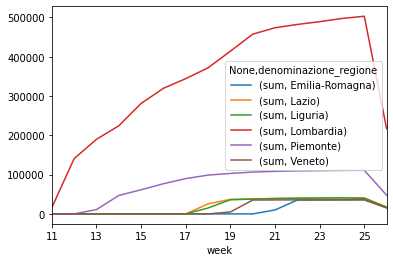

In [105]:
table3 = province[province.totale_casi>5000].pivot_table('totale_casi', index = ['week'], 
                                                         columns = 'denominazione_regione' , aggfunc=['sum'], fill_value = 0.0)
table3.plot()

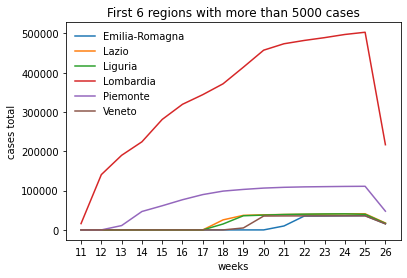

In [123]:
ax = plt.axes()
ax.plot(table3)
ax.set(xlabel='weeks', ylabel='cases total', title='First 6 regions with more than 5000 cases');
ax.legend(['Emilia-Romagna','Lazio',  'Liguria',
            'Lombardia','Piemonte','Veneto'], loc='upper left', frameon=False)

In [124]:
#table3.columns
regioni.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note', 'new_date', 'month',
       'week'],
      dtype='object')

In [125]:
#Regioni

tableR1 = regioni.pivot_table('totale_casi', index = ['denominazione_regione'], 
                                                         columns = 'month' , aggfunc=['mean'], fill_value = 0.0)
round(tableR1,2)

mean                                        
month                      02        03        04        05        06
denominazione_regione                                                
Abruzzo                  0.67    403.68   2295.90   3143.13   3273.13
Basilicata               0.00     57.13    322.17    391.45    400.47
Calabria                 0.33    187.26    950.83   1141.97   1166.17
Campania                 3.33    637.10   3691.33   4652.16   4703.43
Emilia-Romagna          91.67   5184.55  20901.77  27032.90  28114.80
Friuli Venezia Giulia    0.00    560.52   2520.23   3174.06   3294.57
Lazio                    3.50    935.29   5167.40   7331.77   7938.23
Liguria                 15.33   1103.97   5946.87   9052.58   9877.23
Lombardia              369.83  17849.39  61810.10  83729.13  91775.00
Marche                   3.50   1515.29   5380.53   6584.77   6760.53
Molise                   0.00     45.65    254.53    386.35    440.10
P.A. Bolzano             0.83    427.00   2129.50   2573.65   2615.43
P.A. Trento              0.00    573.16   3162.33   4332.87   4541.60
Piemonte                 5.50   2903.19  18530.03  29205.26  31063.33
Puglia                   1.17    530.61   3173.33   4348.16   4517.67
Sardegna                 0.00    217.61   1112.60   1342.94   1362.80
Sicilia                  3.00    469.52   2532.23   3360.35   3301.87
Toscana                  4.17   1487.71   7570.33   9871.55  10181.50
Umbria                   0.00    343.84   1308.50   1418.00   1436.03
Valle d'Aosta            0.00    198.55    957.50   1165.23   1191.27
Veneto                 100.00   3392.29  14566.10  18822.52  19219.23

In [159]:
tableR2 = regioni[regioni.totale_casi>5000].pivot_table(['ricoverati_con_sintomi', 'terapia_intensiva','totale_ospedalizzati','totale_positivi',
       'dimessi_guariti','deceduti','totale_casi'],index = ['denominazione_regione'], 
                         columns = ['month'], 
                         aggfunc=['mean'], fill_value = 0.0)
stacked = tableR2.stack(1)
round(stacked,2)

mean                      \
month                                               03        04        05   
denominazione_regione                                                        
Emilia-Romagna        deceduti                 1082.00   2743.20   3917.42   
                      dimessi_guariti           728.31   5326.17  17009.39   
                      ricoverati_con_sintomi   3038.62   3290.23   1061.68   
                      terapia_intensiva         298.77    309.00    123.19   
                      totale_casi              9907.38  20901.77  27032.90   
                      totale_ospedalizzati     3337.38   3599.23   1184.87   
                      totale_positivi          8097.08  12832.40   6106.10   
Lazio                 deceduti                    0.00    367.06    613.13   
                      dimessi_guariti             0.00   1197.35   2792.77   
                      ricoverati_con_sintomi      0.00   1394.18   1160.39   
                      terapia_intensiva           0.00    172.94     76.42   
                      totale_casi                 0.00   5946.71   7331.77   
                      totale_ospedalizzati        0.00   1567.12   1236.81   
                      totale_positivi             0.00   4382.29   3925.87   
Liguria               deceduti                    0.00    938.18   1339.19   
                      dimessi_guariti             0.00   2166.05   5333.35   
                      ricoverati_con_sintomi      0.00    882.50    389.45   
                      terapia_intensiva           0.00    106.09     33.97   
                      totale_casi                 0.00   6551.59   9052.58   
                      totale_ospedalizzati        0.00    988.59    423.42   
                      totale_positivi             0.00   3447.36   2380.03   
Lombardia             deceduti                 3066.74  11239.23  15290.10   
                      dimessi_guariti          4826.83  18727.60  39676.00   
                      ricoverati_con_sintomi   7807.17  10483.27   4804.23   
                      terapia_intensiva         982.87   1024.67    309.13   
                      totale_casi             23273.09  61810.10  83729.13   
                      totale_ospedalizzati     8790.04  11507.93   5113.35   
                      totale_positivi         15379.52  31843.27  28763.03   
Marche                deceduti                    0.00    807.95    970.13   
                      dimessi_guariti             0.00   1747.81   3159.74   
                      ricoverati_con_sintomi      0.00    783.24    204.00   
                      terapia_intensiva           0.00     83.19     23.65   
                      totale_casi                 0.00   5770.62   6584.77   
                      totale_ospedalizzati        0.00    866.43    227.65   
                      totale_positivi             0.00   3214.86   2454.90   
Piemonte              deceduti                  593.12   2012.50   3541.52   
                      dimessi_guariti           184.62   3528.70  14811.74   
                      ricoverati_con_sintomi   2833.88   3217.17   1697.42   
                      terapia_intensiva         420.75    339.63    110.94   
                      totale_casi              7381.88  18530.03  29205.26   
                      totale_ospedalizzati     3254.62   3556.80   1808.35   
                      totale_positivi          6604.12  12988.83  10852.00   
Toscana               deceduti                    0.00    569.48    967.23   
                      dimessi_guariti             0.00   1159.90   5776.06   
                      ricoverati_con_sintomi      0.00    902.55    274.94   
                      terapia_intensiva           0.00    212.10     65.42   
                      totale_casi                 0.00   7663.55   9871.55   
                      totale_ospedalizzati        0.00   1114.66    340.35   
                      totale_positivi             0.00   5934.17   3128.

In [161]:
pd.merge(regioni, province, on='codice_regione')

,data_x,stato_x,codice_regione,denominazione_regione_x,lat_x,long_x,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,codice_provincia,denominazione_provincia,sigla_provincia,lat_y,long_y,totale_casi_y,note_y,new_date_y,month_y,week_y
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-24-08,02,08
1,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,67,Teramo,TE,42.658918,13.704400,0,None,2020-02-24-08,02,08
2,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,68,Pescara,PE,42.464584,14.213648,0,None,2020-02-24-08,02,08
3,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,69,Chieti,CH,42.351032,14.167546,0,None,2020-02-24-08,02,08
4,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,66,L'Aquila,AQ,42.351222,13.398438,0,None,2020-02-25-08,02,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751419,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,25,Belluno,BL,46.138375,12.217042,1191,None,2020-06-30-26,06,26
1751420,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,26,Treviso,TV,45.667546,12.245074,2673,None,2020-06-30-26,06,26
1751421,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,27,Venezia,VE,45.434905,12.338452,2682,None,2020-06-30-26,06,26
1751422,2020-06-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,21,0,21,441,...,28,Padova,PD,45.406930,11.876087,3954,None,2020-06-30-26,06,26


In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

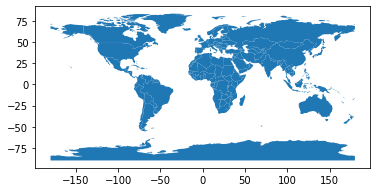

In [7]:
countries.plot()

In [8]:
italy=countries[countries.country=='Italy']
#italy.plot()

In [59]:
italy_map = gpd.read_file("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\Limiti01012018\\Limiti01012018\\ProvCM01012018\\ProvCM01012018_WGS84.shp")
#print(italy_map.head())

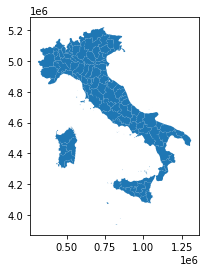

In [23]:
italy_map.plot()

Autori: 
    Ferica Sauro Graziano
    Martina Pacifici

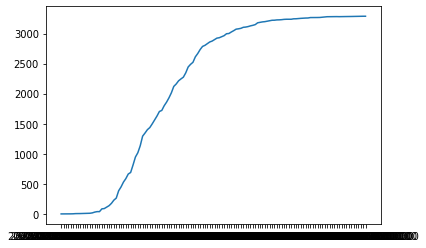

In [44]:
plt.plot(regioni.data[regioni.denominazione_regione=='Abruzzo'], regioni.totale_casi[regioni.denominazione_regione=='Abruzzo']) 

In [45]:
province.rename(columns={'sigla_provincia':'SIGLA'}, inplace = True)

In [46]:
province

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,SIGLA,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...,...
16505,2020-06-30T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2682,None
16506,2020-06-30T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,3954,None
16507,2020-06-30T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,444,None
16508,2020-06-30T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,None,NaN,NaN,325,None


In [47]:
province_2set = italy_map.merge(province, on='SIGLA')

In [48]:
province_2set

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,...,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,lat,long,totale_casi,note
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,2020-02-24T18:00:00,ITA,1,Piemonte,2,Vercelli,45.323981,8.423234,0,None
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,2020-02-25T18:00:00,ITA,1,Piemonte,2,Vercelli,45.323981,8.423234,0,None
2,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,2020-02-26T18:00:00,ITA,1,Piemonte,2,Vercelli,45.323981,8.423234,0,None
3,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,2020-02-27T18:00:00,ITA,1,Piemonte,2,Vercelli,45.323981,8.423234,0,None
4,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,2020-02-28T18:00:00,ITA,1,Piemonte,2,Vercelli,45.323981,8.423234,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13690,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,2020-06-26T17:00:00,ITA,20,Sardegna,95,Oristano,39.903811,8.591183,61,None
13691,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,2020-06-27T17:00:00,ITA,20,Sardegna,95,Oristano,39.903811,8.591183,61,None
13692,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,2020-06-28T17:00:00,ITA,20,Sardegna,95,Oristano,39.903811,8.591183,61,None
13693,5,20,95,0,95,Oristano,-,Oristano,OR,446057.968912,...,2020-06-29T17:00:00,ITA,20,Sardegna,95,Oristano,39.903811,8.591183,61,None


In [54]:
regioni.shape

(2688, 21)

In [55]:
province.shape

(16510, 11)

In [57]:
italy_map.shape

(107, 13)

In [58]:
province_2set.shape

(13695, 23)

In [19]:
regioni.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note', 'new_date', 'month',
       'week'],
      dtype='object')